In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function
from collections import OrderedDict

import os
import sys
import timeit
import pickle

import scipy.io as sio
import numpy as np
import theano
import theano.tensor as T

sys.path.insert(0, "/home/cwhuang/DVTL/Model/")
import nnet as nn
import criteria	as er
import util
import DANN

import OfficeFeaturePlot as fp

Using gpu device 0: GeForce GTX TITAN (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5005)


number of minibatch at one epoch: 5, batch size source : 114, target : 97 
 validation size, S:330, T:280, test size, S:220, T:190
... building the model
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 1
DomainClassifier is constructed with hidden layer number 0
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 1
DomainClassifier is constructed with hidden layer number 0
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 1
DomainClassifier is constructed with hidden layer number 0
... training
Initial, test accuracy: source domain :11.363636 %, target domain 7.894737 %
epoch 1, minibatch 5/5, training loss 0.547251, validation loss 0.967931 
     epoch 1, minibatch 5/5, test accuracy of best model: source domain :12.727273 %, target domain 14.736842 %
epoch 2, minibatch 5/5, training loss 0.560872, validation loss 0.789895 
     epoch

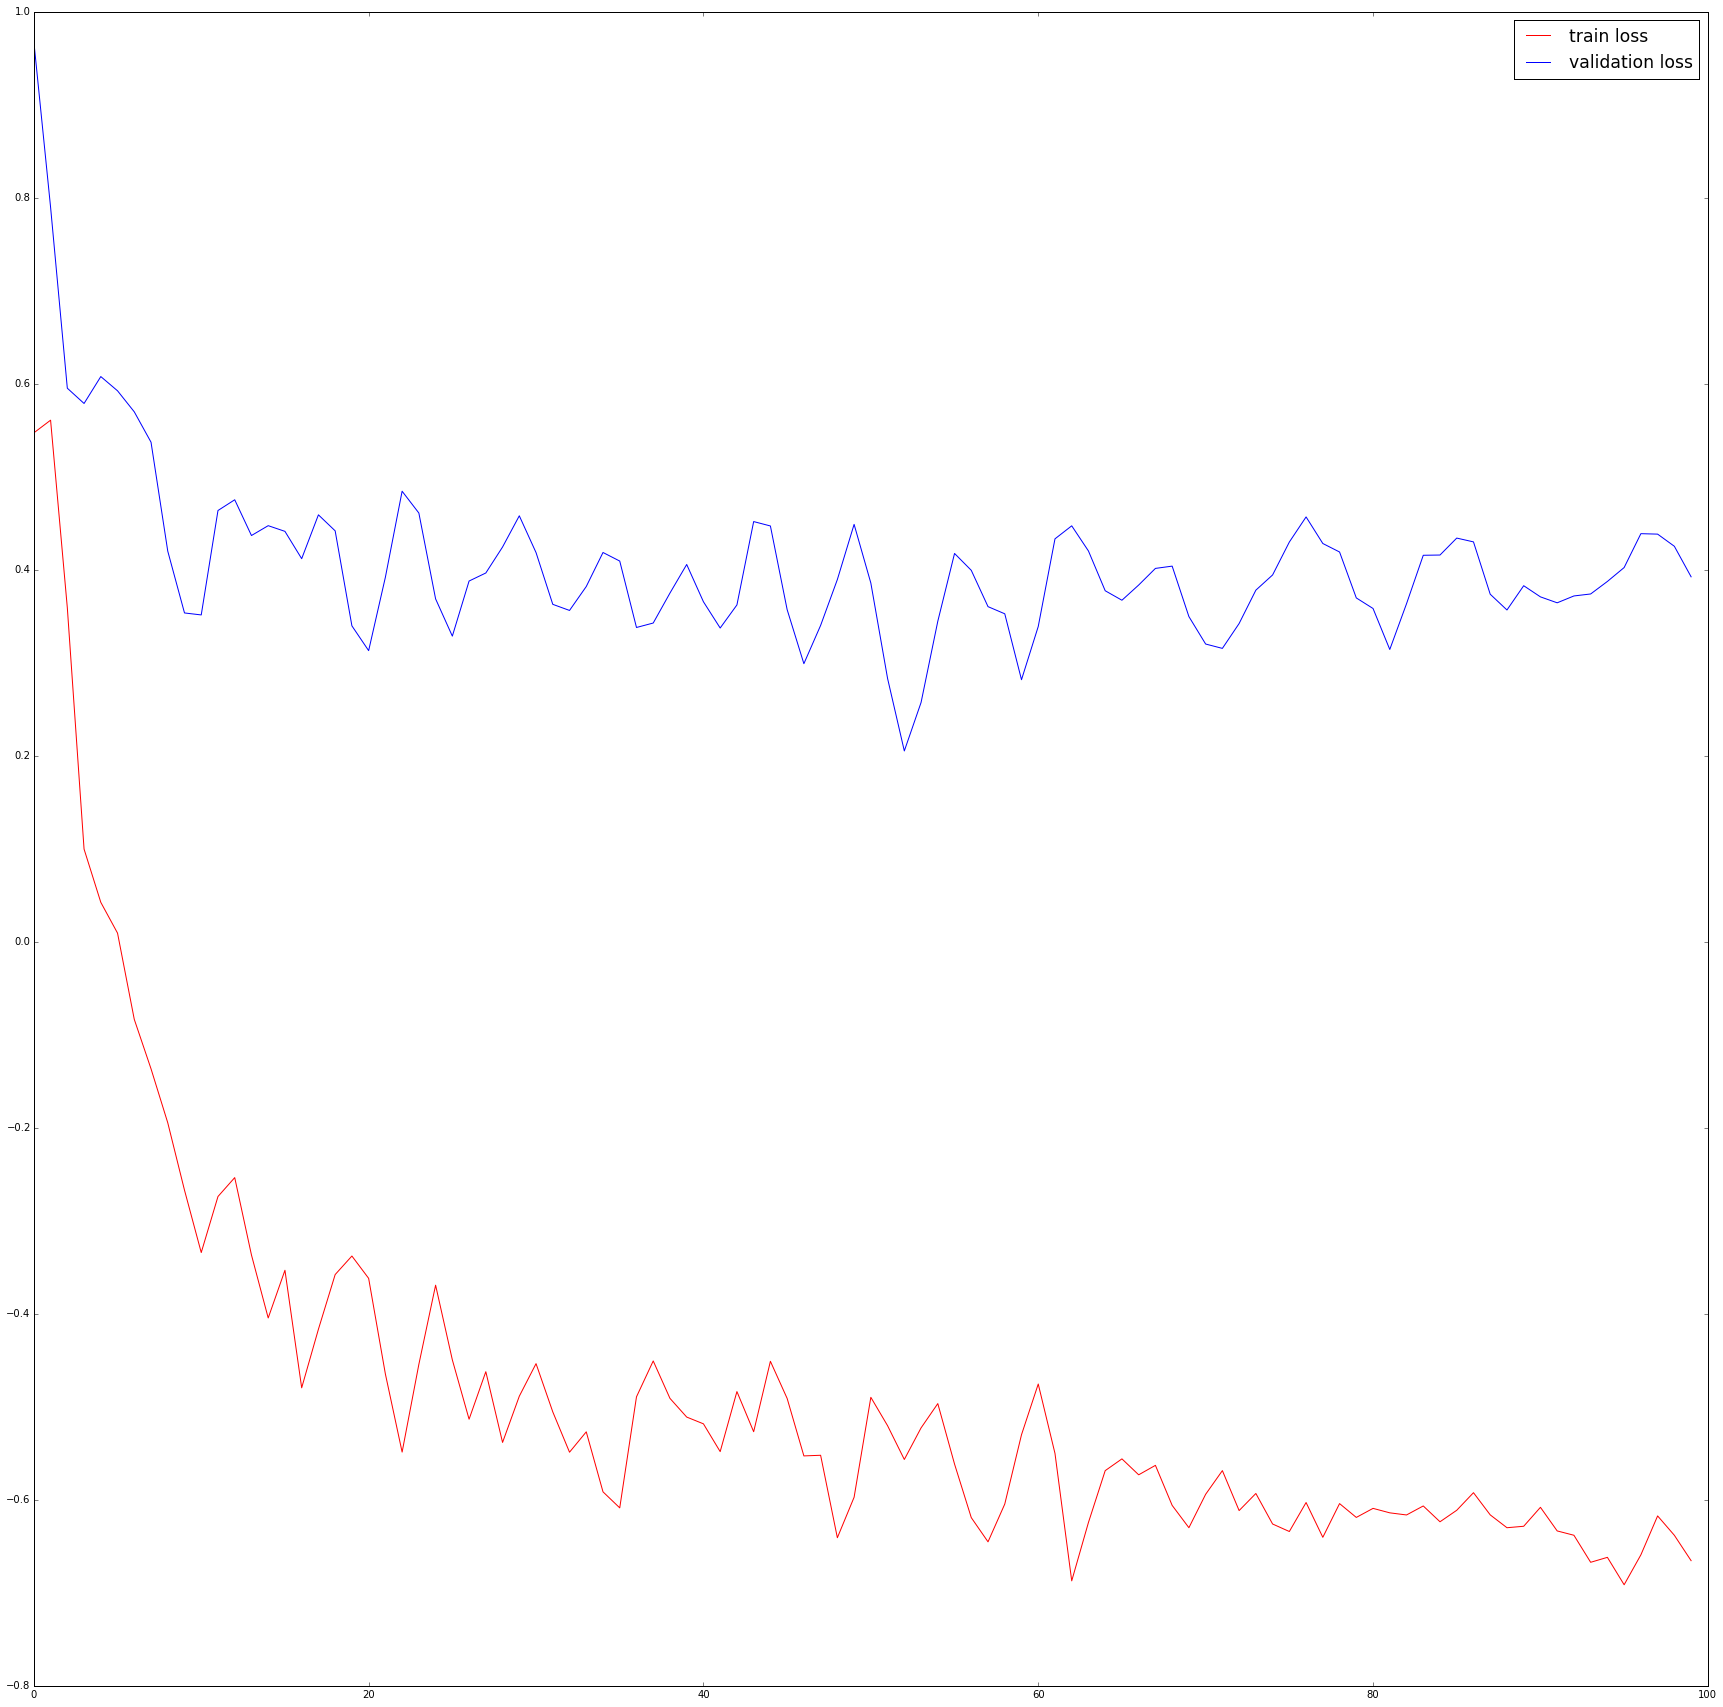

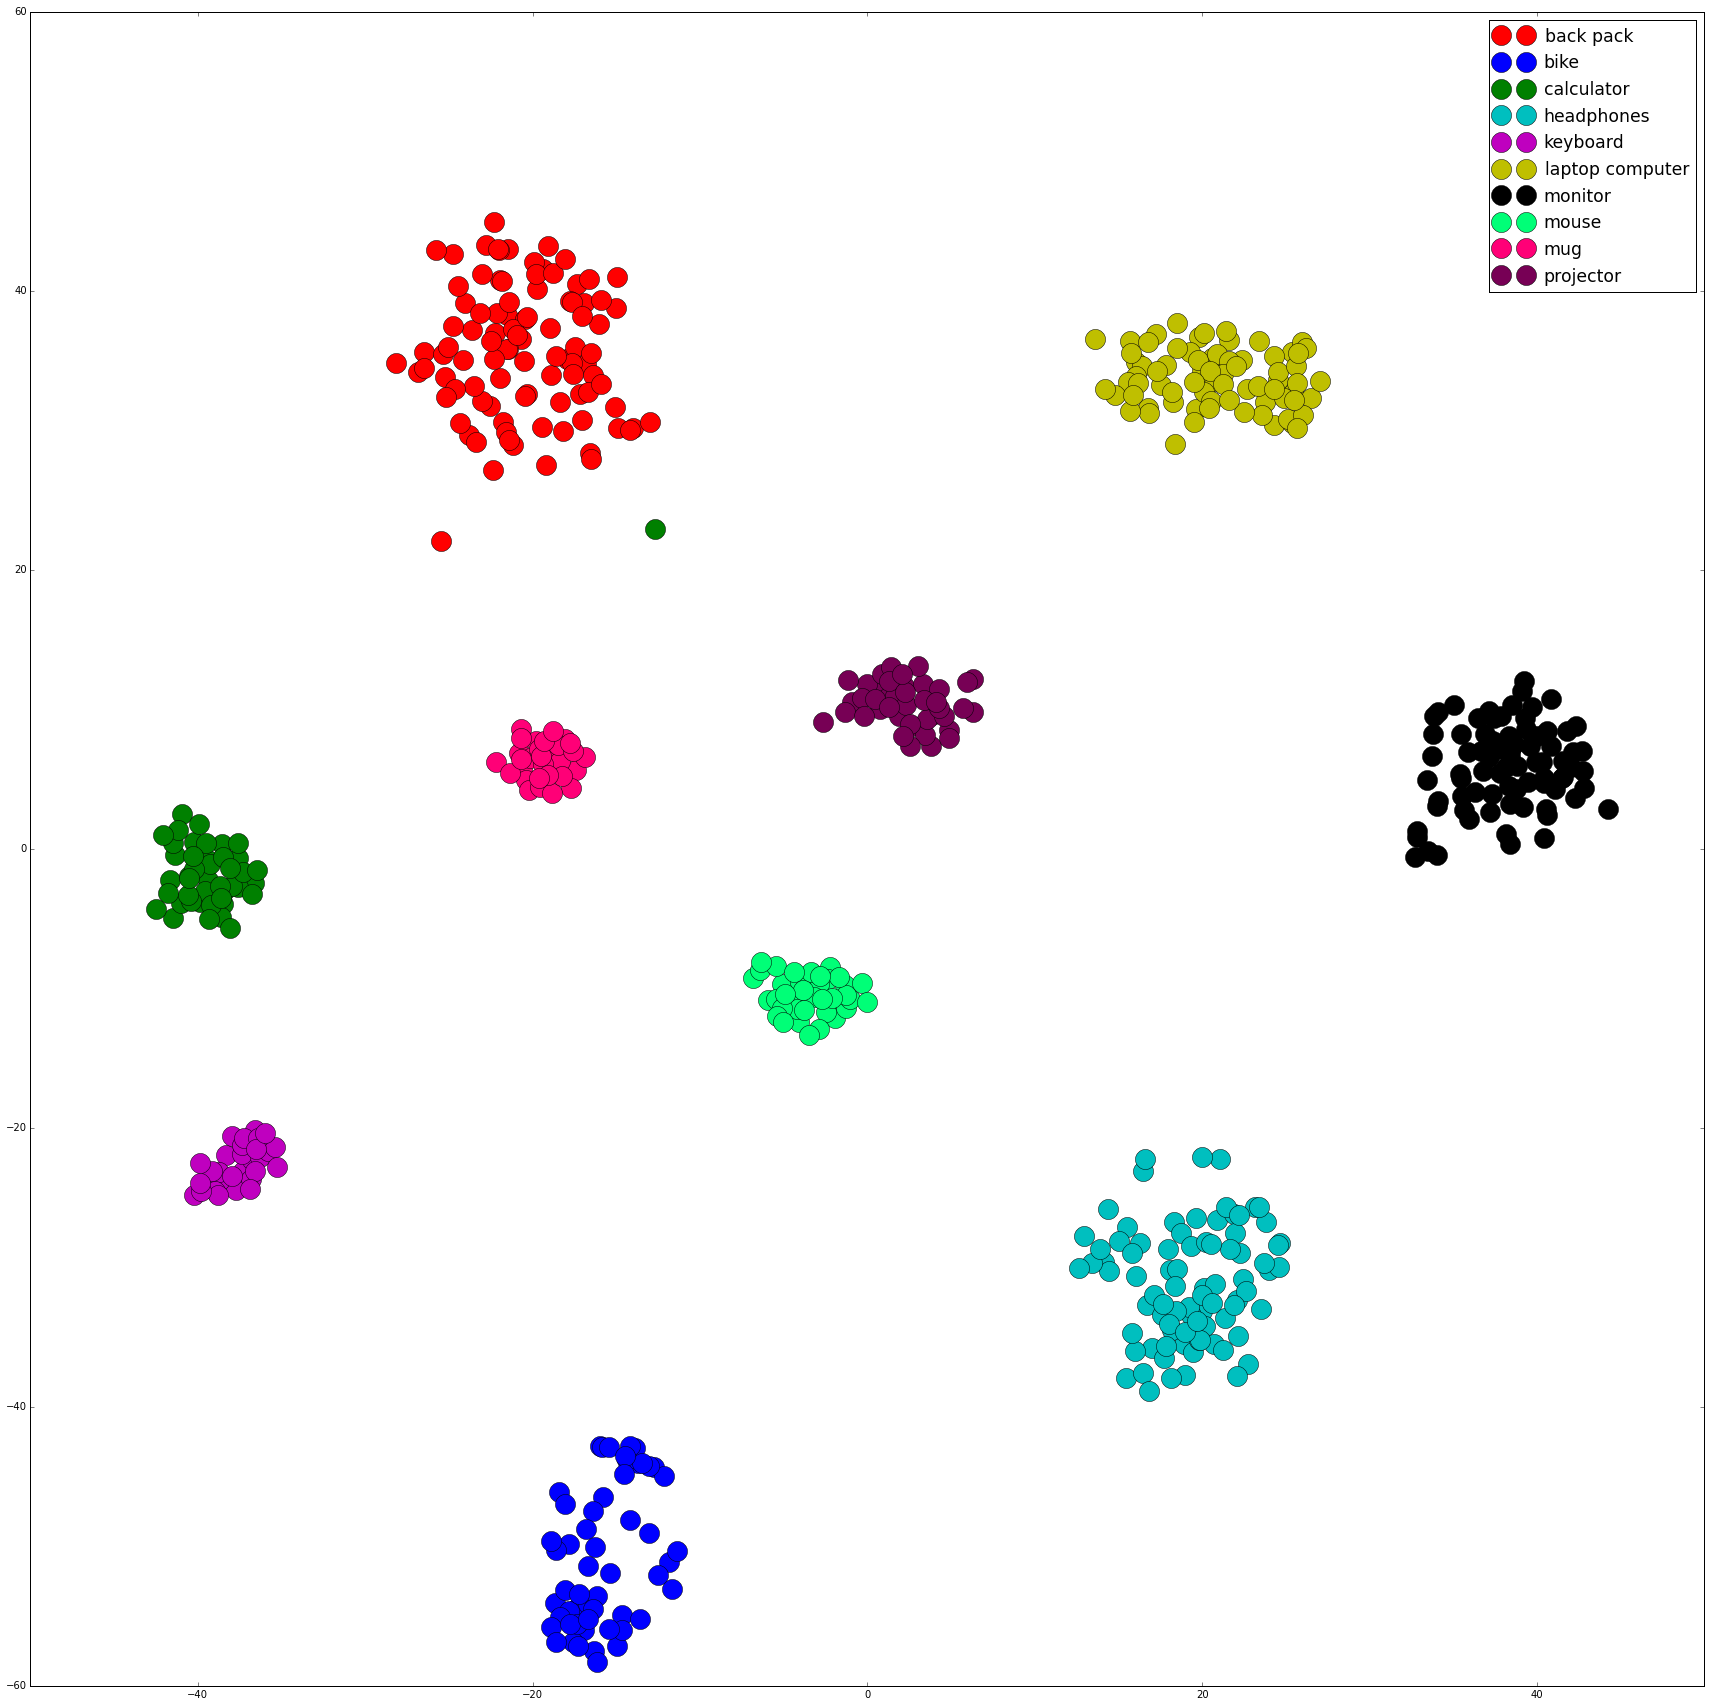

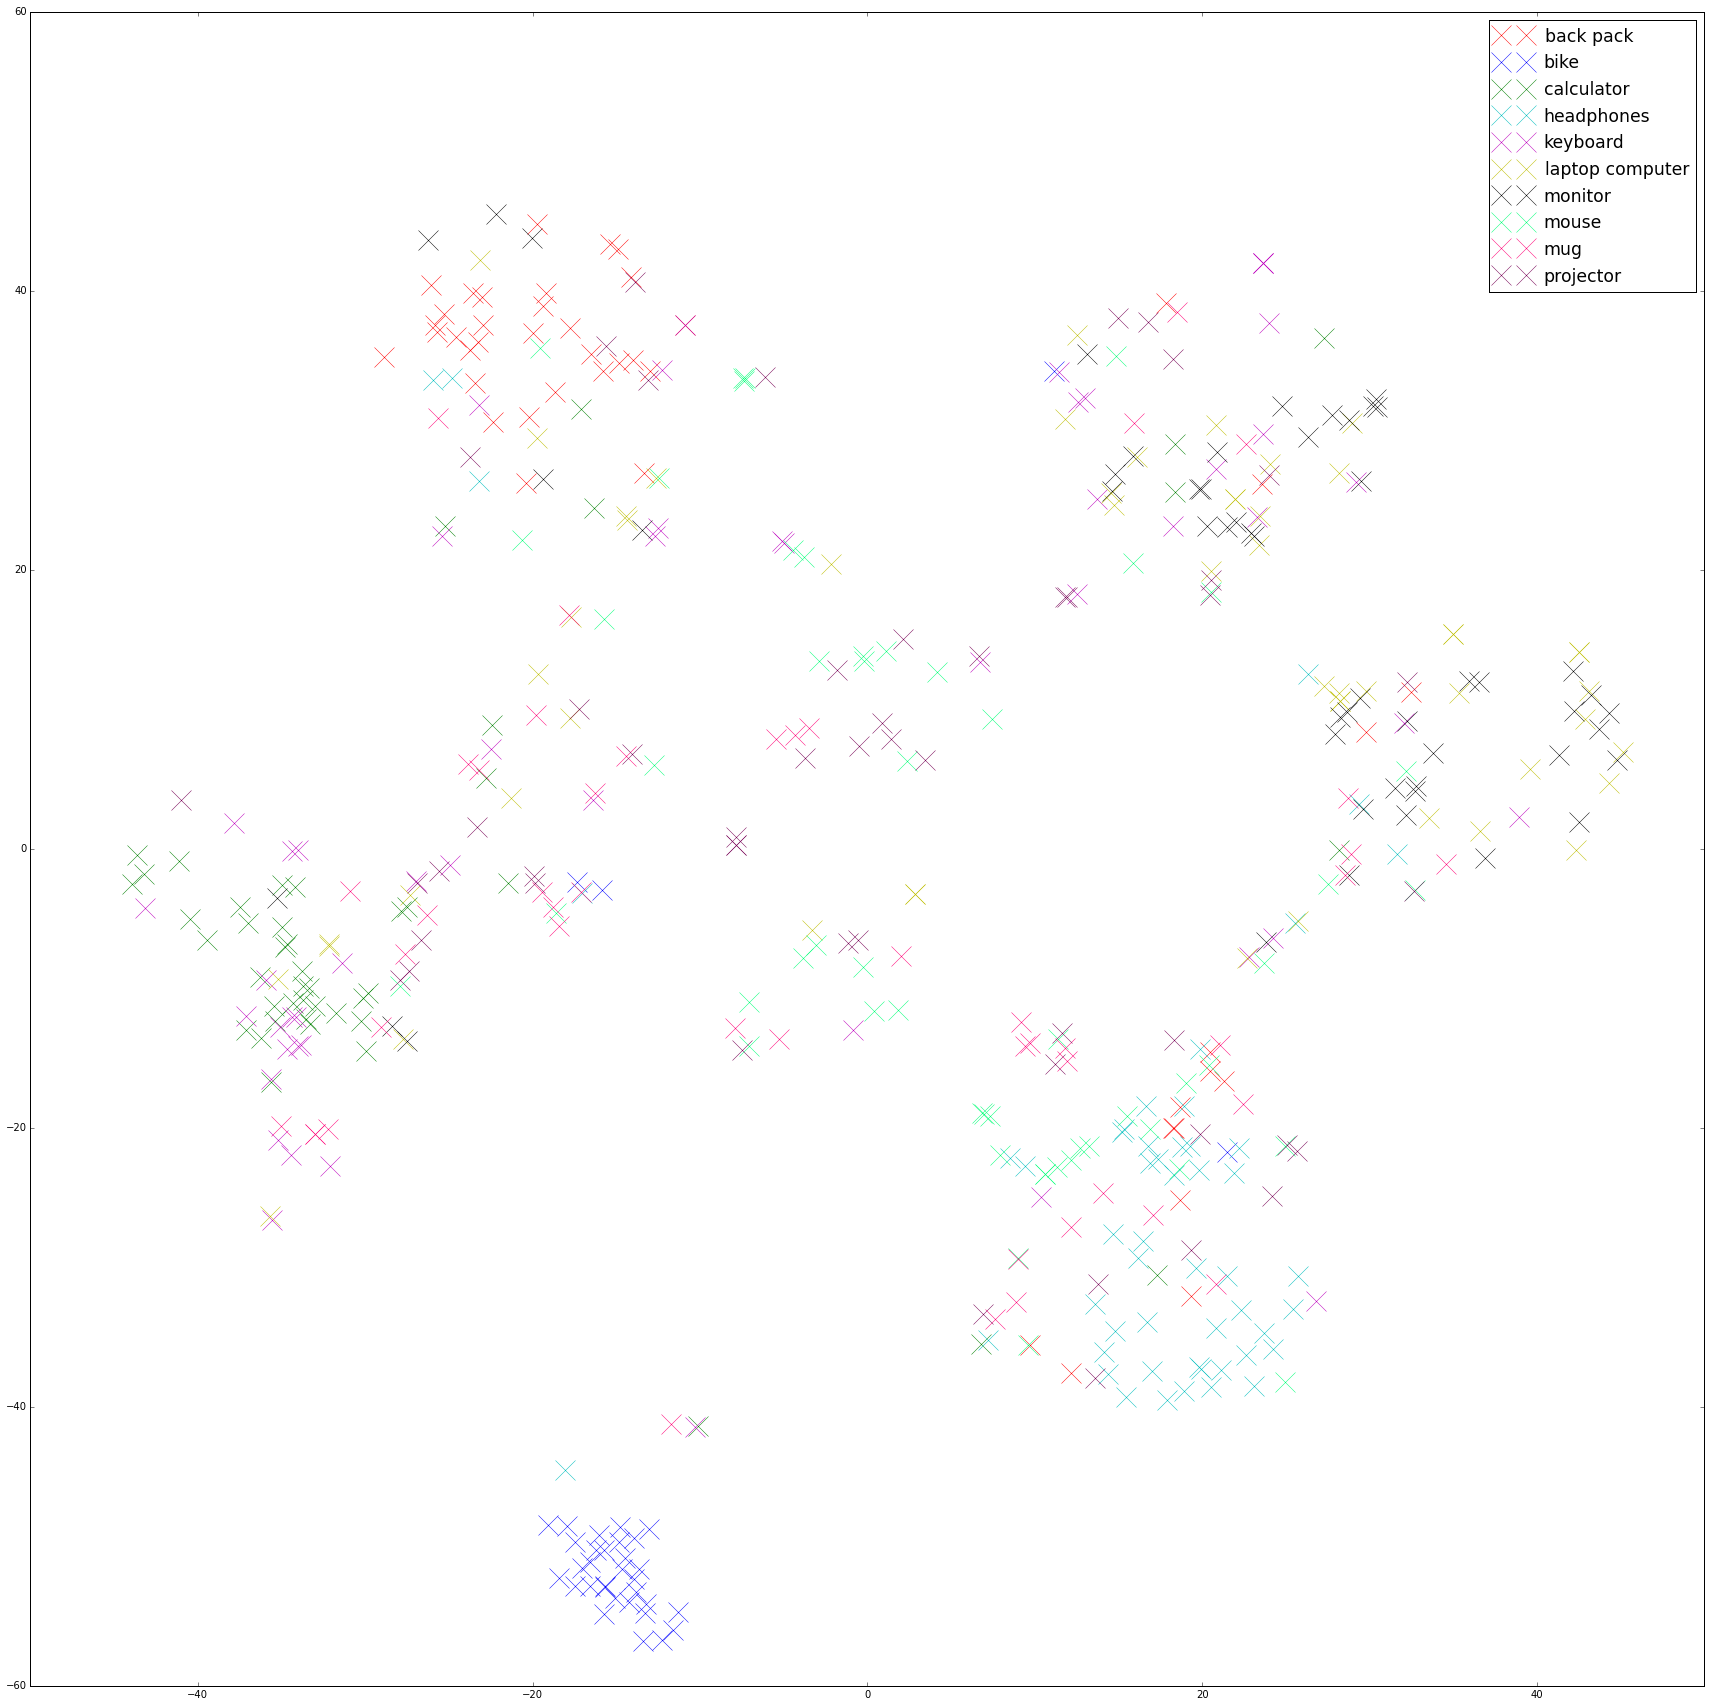

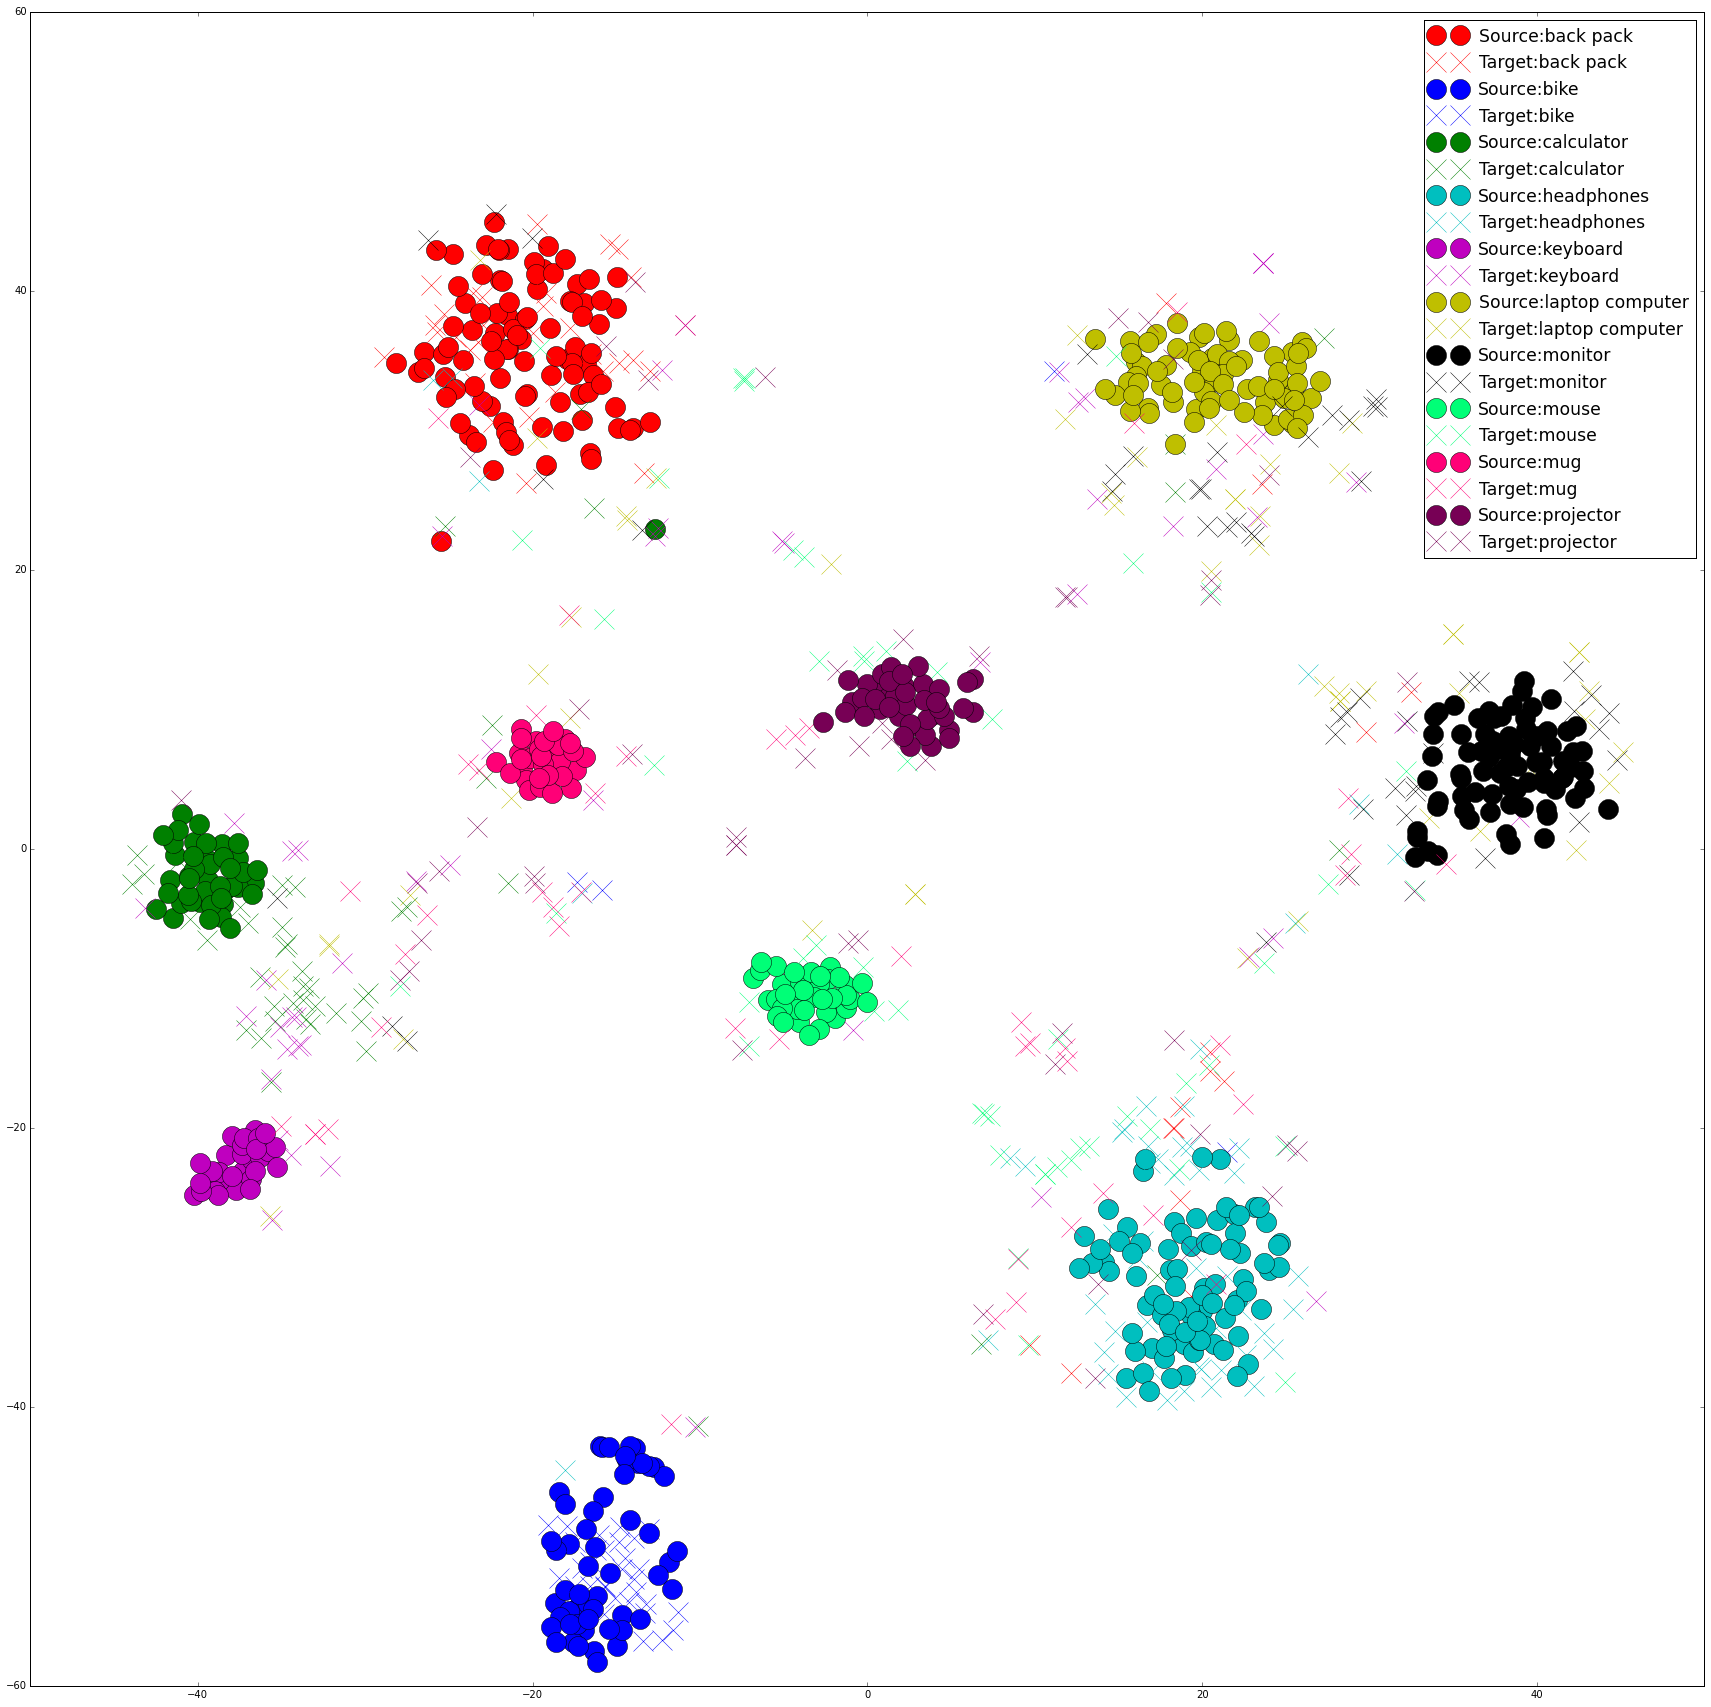

In [2]:
'''Model Construct'''
if __name__ == '__main__':
    
    source_file = '/home/cwhuang/DVTL/Dataset/Office/Caltech10_SURF_L10.npy'
    target_file = '/home/cwhuang/DVTL/Dataset/Office/amazon_SURF_L10.npy'

    source_data = np.load(source_file)
    target_data = np.load(target_file)
    
    #source_data, target_data = DataDuplicate.DataDuplicate(source_data, target_data)  
    
    
    ########################################################################
    ###                        Coefficient Initial                       ###
    ########################################################################        
    
    coef = DANN.DANN_coef(        
        beta = 2,
        optimize = 'Adam_update'           
    )    
    
    x_dim = 800
    y_dim = 10
    d_dim = 2
    z_dim = 100                #dimension of latent feature    
    h_dim = 300             #dimension of hidden unit      
    activation = T.nnet.sigmoid
    learning_rate = 0.005

    struct = DANN.DANN_struct()        
    struct.encoder.layer_dim = [x_dim, h_dim, z_dim]
    struct.encoder.activation = [activation, activation]
    struct.encoder.learning_rate = [learning_rate, learning_rate]
    struct.encoder.decay = [1, 1]                
    struct.classifier.layer_dim = [z_dim, 50, y_dim]
    struct.classifier.activation = [activation, T.nnet.softmax]   
    struct.classifier.learning_rate = [learning_rate, learning_rate]
    struct.classifier.decay = [1, 1]  
    struct.DomainClassifier.layer_dim = [z_dim, d_dim]
    struct.DomainClassifier.activation = [T.nnet.softmax]
    struct.DomainClassifier.learning_rate = [learning_rate, learning_rate]
    struct.DomainClassifier.decay = [1, 1]     
        
    description = 'Office_DANN_%s' % (coef.optimize)
    
    features_model, test_model, trained_param = DANN.DANN_training(
        source_data = source_data,
        target_data = target_data,
        n_train_batches = 5,
        n_epochs = 100,
        k = 10,
        struct = struct,
        coef = coef,
        description = description
    )
    
    fp.features_plot(features_model, test_model, source_data, target_data, description) 